In [1]:
import csv
import statistics
from scipy.stats import normaltest
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import probplot

# BMP388, 50Hz sample rate (8x pressure, 1x temperature, IIR disabled)

In [2]:
pa = []
zcm = []
with open('bmp388_512samples_1.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        pa.append(float(row[0]))
        zcm.append(float(row[1]))
pa_arr = np.array(pa)        
zcm_arr = np.array(zcm)
pa = []
zcm = []

# Pressure Statistics

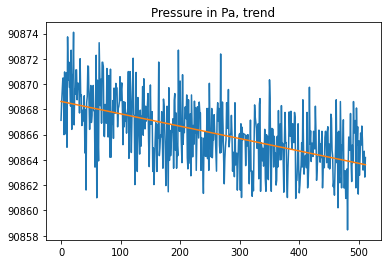

In [3]:
X = list(range(0, len(pa_arr) ) )
X = np.reshape(X, (len(X), 1))
model = LinearRegression()
model.fit(X, pa_arr)
trend = model.predict(X)
# plot trend
plt.plot(pa_arr)
plt.title('Pressure in Pa, trend')
plt.plot(trend)
plt.show()

# De-trend data

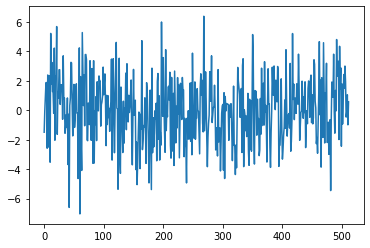

In [4]:
pa_detrended = pa_arr - trend
plt.plot(pa_detrended)
plt.show()

In [5]:
pa_variance = statistics.variance(pa_detrended)
print("Pressure noise variance = {0} Pa^2".format(pa_variance))

Pressure noise variance = 4.974331442803269 Pa^2


In [6]:
statistic, p_value = normaltest(pa_detrended)
print("Pressure noise normality test : p-value = {0}".format(p_value))

Pressure noise normality test : p-value = 0.8529853160704518


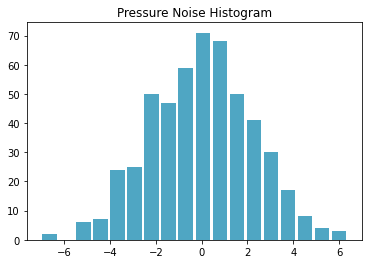

In [7]:
n, bins, patches = plt.hist(x=pa_detrended, bins='auto', color='#0580aa',
                            alpha=0.7, rwidth=0.85)
plt.title('Pressure Noise Histogram')
plt.show()

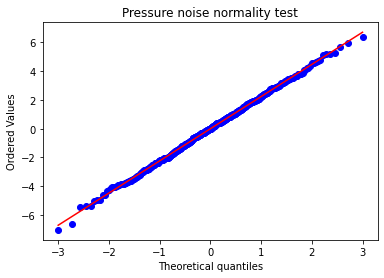

In [8]:
probplot(x=pa_detrended,dist='norm',plot=plt)
plt.title('Pressure noise normality test')
plt.show()

# Altitude Statistics

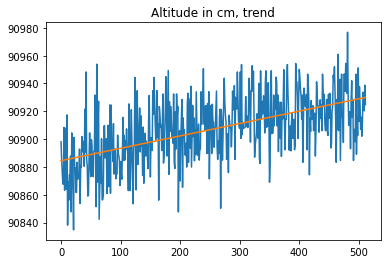

In [9]:
model = LinearRegression()
model.fit(X, zcm_arr)
trend = model.predict(X)
# plot trend
plt.plot(zcm_arr)
plt.title('Altitude in cm, trend')
plt.plot(trend)
plt.show()

# De-trend data

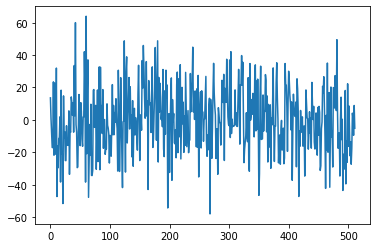

In [10]:
zcm_detrended = zcm_arr - trend
plt.plot(zcm_detrended)
plt.show()

In [11]:
zcm_variance = statistics.variance(zcm_detrended)
print("Altitude noise variance : {0} cm^2".format(zcm_variance))

Altitude noise variance : 410.67904353165665 cm^2


In [12]:
statistic, p_value = normaltest(zcm_detrended)
print("Altitude noise normality test : p-value = {0}".format(p_value))

Altitude noise normality test : p-value = 0.8503474135120263


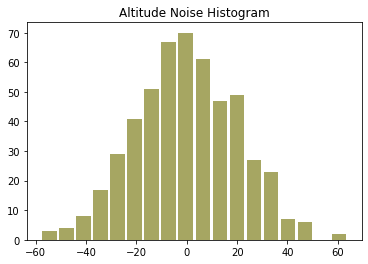

In [13]:
n, bins, patches = plt.hist(x=zcm_detrended, bins='auto', color='#808020',
                            alpha=0.7, rwidth=0.85)
plt.title('Altitude Noise Histogram')
plt.show()

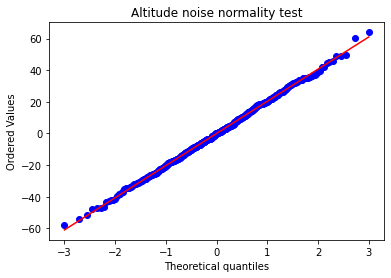

In [14]:
probplot(x=zcm_detrended,dist='norm',plot=plt)
plt.title('Altitude noise normality test')
plt.show()